### Libraries

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Data Exploration

We load both the <i>train</i> and <i>test</i> datasets and explore and contrast their structure and content.

In [2]:
train = pd.read_csv('../../data/train.csv')
test = pd.read_csv('../../data/test.csv')

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.shape

(891, 12)

In [4]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
#Excluding the 'PassengerId' index column to reduce clutter

train[train.columns.difference(['PassengerId'])].describe(include = 'all')

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
count,714.000000,204,889,891.000000,891,891.000000,891.000000,891,891.000000,891.000000,891
unique,NaN,147,3,NaN,891,NaN,NaN,2,NaN,NaN,681
top,NaN,C23 C25 C27,S,NaN,"Holverson, Mrs. Alexander Oskar (Mary Aline To...",NaN,NaN,male,NaN,NaN,CA. 2343
freq,NaN,4,644,NaN,1,NaN,NaN,577,NaN,NaN,7
mean,29.699118,NaN,NaN,32.204208,NaN,0.381594,2.308642,NaN,0.523008,0.383838,NaN
std,14.526497,NaN,NaN,49.693429,NaN,0.806057,0.836071,NaN,1.102743,0.486592,NaN
min,0.420000,NaN,NaN,0.000000,NaN,0.000000,1.000000,NaN,0.000000,0.000000,NaN
25%,20.125000,NaN,NaN,7.910400,NaN,0.000000,2.000000,NaN,0.000000,0.000000,NaN
50%,28.000000,NaN,NaN,14.454200,NaN,0.000000,3.000000,NaN,0.000000,0.000000,NaN
75%,38.000000,NaN,NaN,31.000000,NaN,0.000000,3.000000,NaN,1.000000,1.000000,NaN


In [6]:
train['Survived'].value_counts(normalize = True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

Two features - <code>Parch</code> and <code>SibSp</code>, while numeric in type, have a very skewed distribution. We get a deeper look at the distribution of values of these two features.

In [7]:
train['SibSp'].value_counts(normalize = True)

0    0.682379
1    0.234568
2    0.031425
4    0.020202
3    0.017957
8    0.007856
5    0.005612
Name: SibSp, dtype: float64

In [8]:
train['Parch'].value_counts(normalize = True)

0    0.760943
1    0.132435
2    0.089787
5    0.005612
3    0.005612
4    0.004489
6    0.001122
Name: Parch, dtype: float64

In [9]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We repeat the data exploration steps for the <i>test</i> dataset. 

In [10]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [11]:
test.shape

(418, 11)

In [12]:
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [13]:
test[test.columns.difference(['PassengerId'])].describe(include = 'all')

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Ticket
count,332.000000,91,418,417.000000,418,418.000000,418.000000,418,418.000000,418
unique,NaN,76,3,NaN,418,NaN,NaN,2,NaN,363
top,NaN,B57 B59 B63 B66,S,NaN,"Faunthorpe, Mr. Harry",NaN,NaN,male,NaN,PC 17608
freq,NaN,3,270,NaN,1,NaN,NaN,266,NaN,5
mean,30.272590,NaN,NaN,35.627188,NaN,0.392344,2.265550,NaN,0.447368,NaN
std,14.181209,NaN,NaN,55.907576,NaN,0.981429,0.841838,NaN,0.896760,NaN
min,0.170000,NaN,NaN,0.000000,NaN,0.000000,1.000000,NaN,0.000000,NaN
25%,21.000000,NaN,NaN,7.895800,NaN,0.000000,1.000000,NaN,0.000000,NaN
50%,27.000000,NaN,NaN,14.454200,NaN,0.000000,3.000000,NaN,0.000000,NaN
75%,39.000000,NaN,NaN,31.500000,NaN,0.000000,3.000000,NaN,1.000000,NaN


In [14]:
test['SibSp'].value_counts(normalize = True)

0    0.677033
1    0.263158
2    0.033493
4    0.009569
3    0.009569
8    0.004785
5    0.002392
Name: SibSp, dtype: float64

In [15]:
test['Parch'].value_counts(normalize = True)

0    0.775120
1    0.124402
2    0.078947
3    0.007177
9    0.004785
4    0.004785
6    0.002392
5    0.002392
Name: Parch, dtype: float64

In [16]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

#### Observations
<ol> 
    <li> Overall the two datasets have similar structure and content.
    <li> The chance of survival across all passengers was only ~38%.
    <li> The <i>train</i> dataset has 891 records and each record with 12 features. The <i>test</i> dataset has 418 records.
    <li> Of the features - <code>Name, Sex, Ticket, Cabin, Embarked</code> - have string data and the rest of the features have numeric data.
    <li> For the <i>train</i> dataset, the features - <code>Age, Cabin, Embarked</code> - report 177, 687 and 2 missing values respectively.
    <li> For the <i>test</i> datset, the features - <code>Age, Fare, Cabin</code> - report 86, 1 and 327 missing values.
    <li> For both the datasets, the features - <code>SibSp</code> and <code>Parch</code> - report significantly skewed distribution with ~70% records reporting <code>SibSp</code> = 0 and ~80% records reporting <code>Parch</code> = 0

### Data Pre-processing

For both the <i>train</i> and <i>test</i> datasets, we run the following data pre-processing steps:
<ol> 
    <li> Convert the features <code>Survived, Pclass</code> from <code>int</code> to <code>category</code>.
    <li> Convert the features <code>Sex, Embarked</code> from <code>object</code> to <code>category</code>.
    <li> Given the significant skew in the distribution of their values, we convert the features <code>SibSp, Parch</code> from <code>int</code> to <code>category</code>, such that for the two features the value 0 will represent one category and every other value will represent the second category.

In [17]:
train.loc[:, ['Survived', 'Pclass']] = train.loc[:, ['Survived', 'Pclass']].astype('category')
test.loc[:, 'Pclass'] = test.loc[:, 'Pclass'].astype('category')

train.loc[:, ['Sex', 'Embarked']] = train.loc[:, ['Sex', 'Embarked']].astype('category')
test.loc[:, ['Sex', 'Embarked']] = test.loc[:, ['Sex', 'Embarked']].astype('category')

train.loc[train['SibSp'] != 0, ['SibSp']] = 1
train.loc[train['Parch'] != 0, ['Parch']] = 1
train.loc[:, ['SibSp', 'Parch']] = train.loc[:, ['SibSp', 'Parch']].astype('category')
test.loc[test['SibSp'] != 0, ['SibSp']] = 1
test.loc[test['Parch'] != 0, ['Parch']] = 1
test.loc[:, ['SibSp', 'Parch']] = test.loc[:, ['SibSp', 'Parch']].astype('category')

### Exploratory Data Analysis

We make the reasonable assumption that the survival of a passenger does not depend on the <code>string</code>-type features <code>Name, Ticket, Cabin</code>. For the remaining 7 features, for the <i>train</i> dataset, we plot to explore how the different features vary between the Survivors and the non-Survivors.

#### Distrubution of Survivors by Categorial features

In [18]:
pd.crosstab(index = train['Survived'], columns = train['Pclass'], 
            normalize = 'columns', colnames = ['Passenger Class'], 
            margins = True)

Passenger Class,1,2,3,All
Survived,,,,
0,0.37037,0.527174,0.757637,0.616162
1,0.62963,0.472826,0.242363,0.383838


In [19]:
pd.crosstab(index = train['Survived'], columns = train['Sex'], 
            normalize = 'columns', colnames = ['Sex'], 
            margins = True)

Sex,female,male,All
Survived,,,
0,0.257962,0.811092,0.616162
1,0.742038,0.188908,0.383838


In [20]:
pd.crosstab(index = train['Survived'], columns = train['Embarked'], 
            normalize = 'columns', colnames = ['Port of Embarkation'], 
            margins = True)

Port of Embarkation,C,Q,S,All
Survived,,,,
0,0.446429,0.61039,0.663043,0.617548
1,0.553571,0.38961,0.336957,0.382452


In [21]:
pd.crosstab(index = train['Survived'], columns = train['SibSp'], 
            normalize = 'columns', colnames = ['Siblings on Board'], 
            margins = True)

Siblings on Board,0,1,All
Survived,,,
0,0.654605,0.533569,0.616162
1,0.345395,0.466431,0.383838


In [22]:
pd.crosstab(index = train['Survived'], columns = train['Parch'], 
            normalize = 'columns', colnames = ['Parents/Children on Board'], 
            margins = True)

Parents/Children on Board,0,1,All
Survived,,,
0,0.656342,0.488263,0.616162
1,0.343658,0.511737,0.383838


#### Distribution of Survivors by numerical features

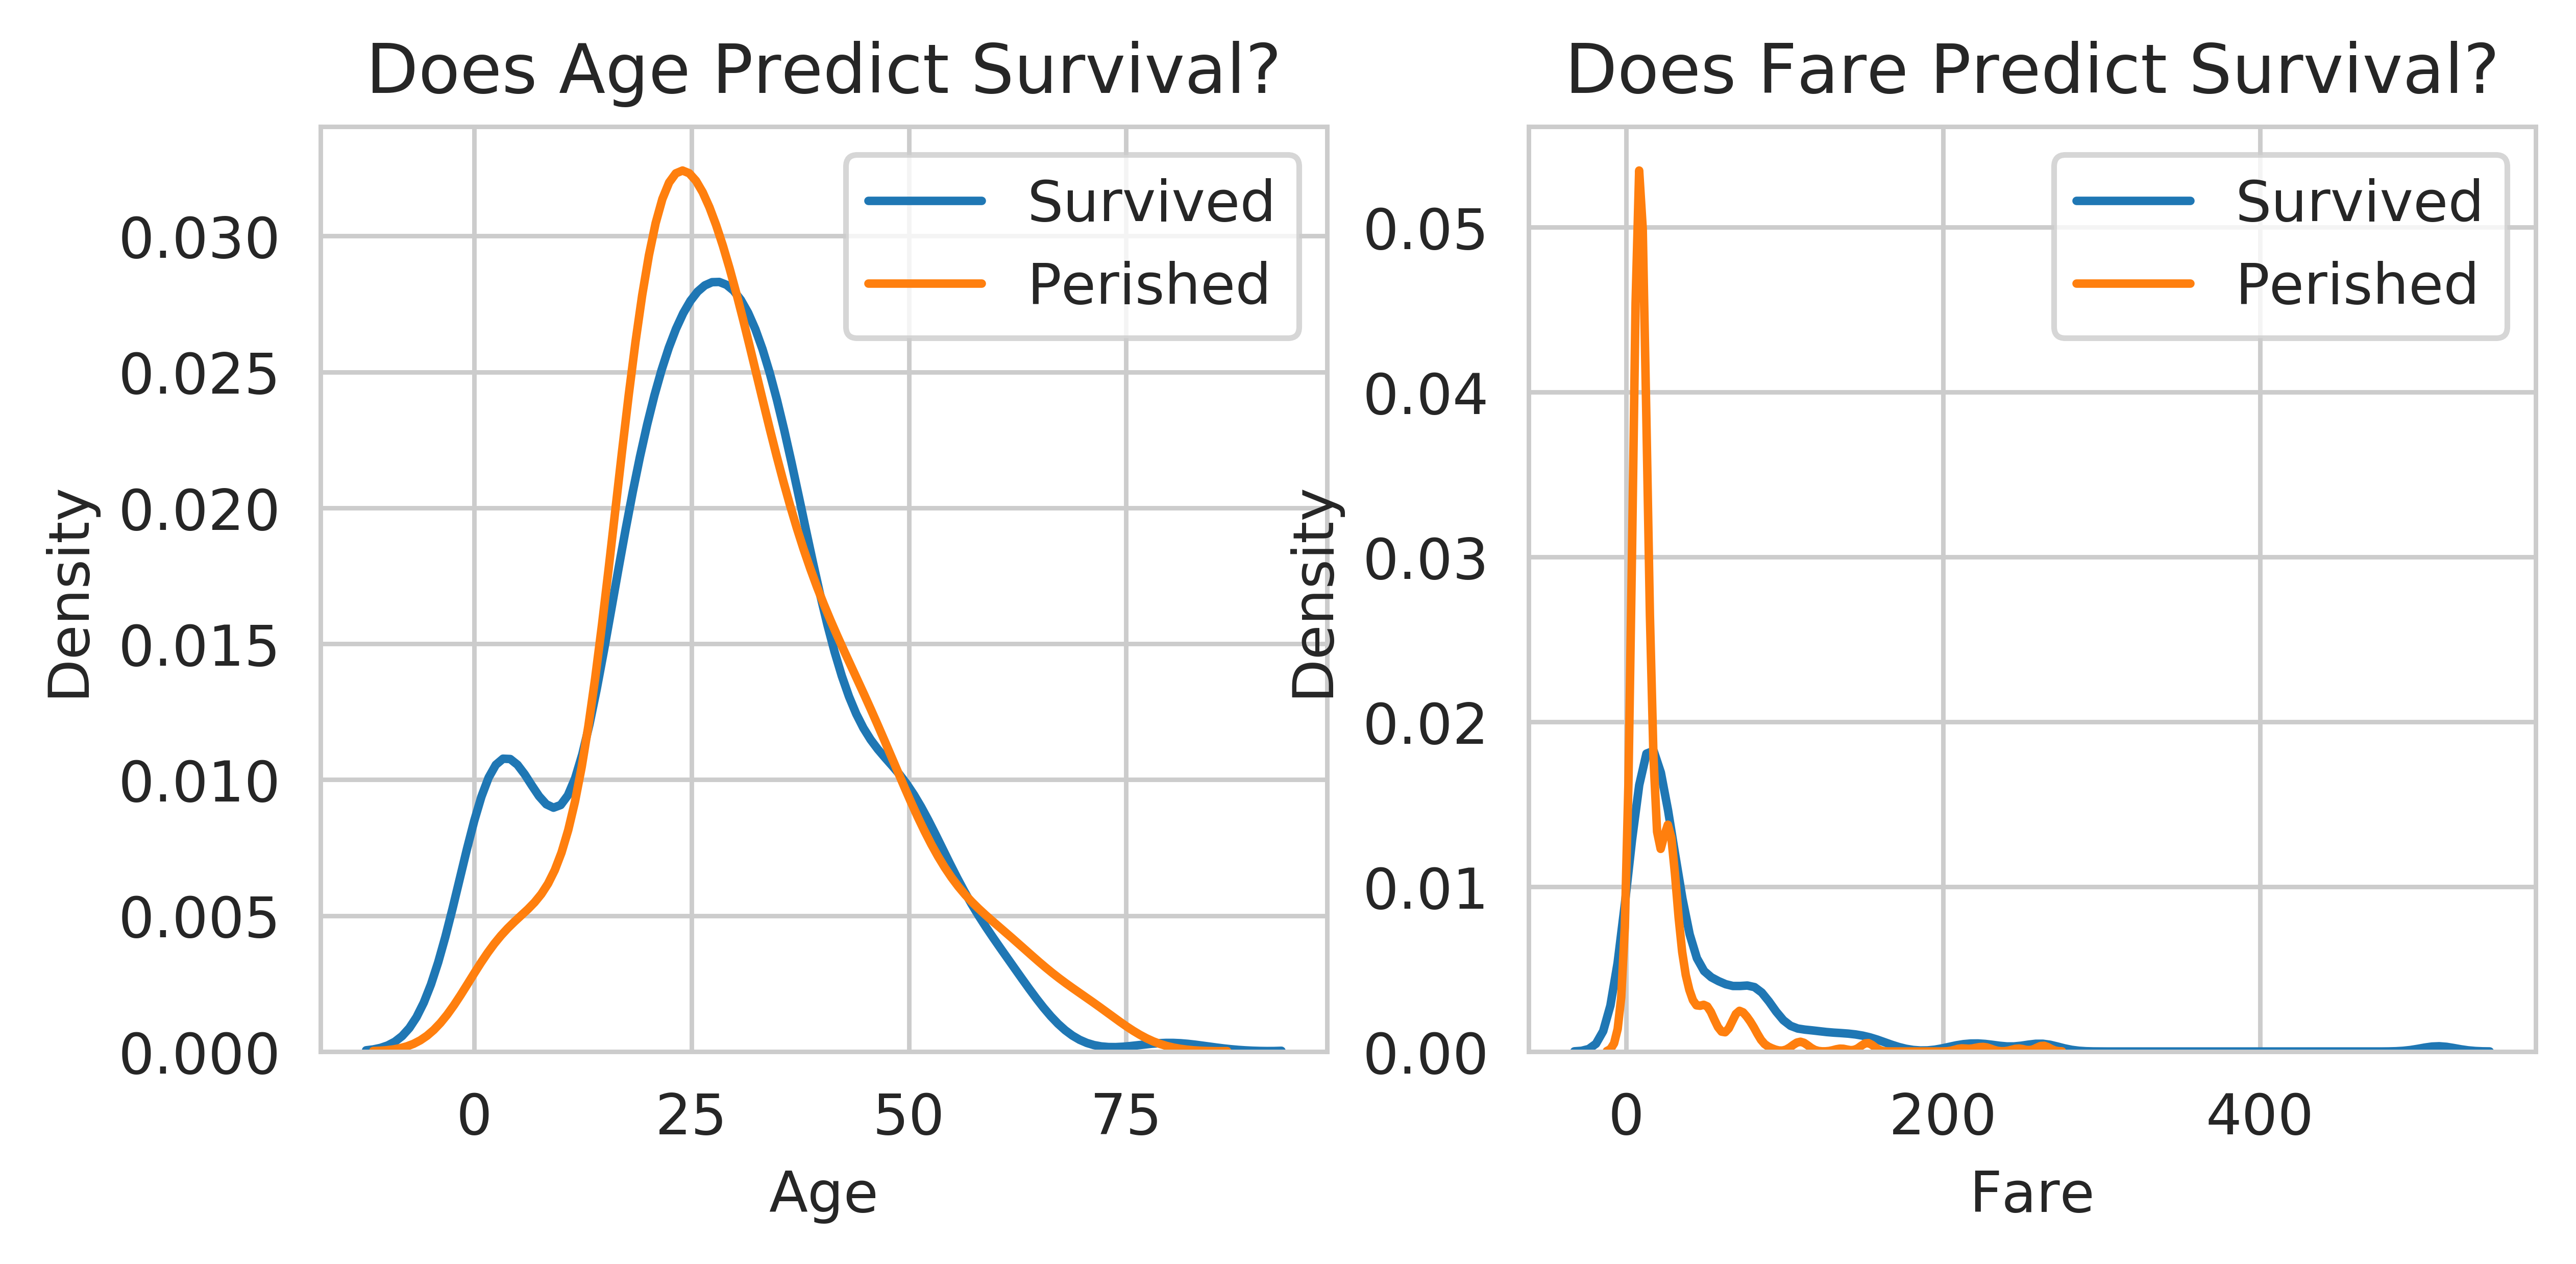

In [106]:
plt.figure(figsize = (7, 3), dpi = 800)

plt.subplot(121)
survived = train.loc[train['Survived'] == 1, ['Age']].dropna()
perished = train.loc[train['Survived'] == 0, ['Age']].dropna()
sns.distplot(survived.Age, hist = False, label = 'Survived')
sns.distplot(perished.Age, hist = False, label = 'Perished')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age v/s Survival?')

plt.subplot(122)
survived = train.loc[train['Survived'] == 1, ['Fare']].dropna()
perished = train.loc[train['Survived'] == 0, ['Fare']].dropna()
sns.distplot(survived.Fare, hist = False, label = 'Survived')
sns.distplot(perished.Fare, hist = False, label = 'Perished')
plt.xlabel('Fare')
plt.ylabel('Density')
plt.title('Fare v/s Survival?')

plt.show()


#### Observations
When compared to the overall chance of survival (~38%), interesting insights emerge:
<ol>
    <li> Chance of survival was dramatically better for passengers in the first class (~63%) than those in the third class (~24%), with the second class passengers also having significantly better chance of survival (~47%) than those in third class.
    <li> Women had a dramatically better chance of survival (~74%) than men (~19%).
    <li> Passengers embarking from port C had much better chance of survival (~55%) than those embarking from the other two ports (~34%-39%).
    <li> It helps to have siblings on board. Those with siblings on board had better chance of survival (~47%) than those that didn't (~35%).
    <li> Similarly, it helps if families are travelling together. Those with familes on board had better chance of survival (~51%) than those that didn't (~34%).
    <li> Surprisingly the chance of survival does not vary meaninfully either with the <code>Age</code> or <code>Fare</code>.
</ol>